In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/churnprediction_ch9.csv', sep=',', index_col=['customer_id'])

In [ ]:
df1.head(5)

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 285fae8412c4720a0c79d95f98434422 to 2c5bc32bc9a9c393d393bfc11c409b0d
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10000 non-null  object 
 1   reload_1     10000 non-null  float64
 2   reload_2     10000 non-null  float64
 3   video        10000 non-null  float64
 4   music        10000 non-null  float64
 5   games        10000 non-null  float64
 6   chat_1       10000 non-null  float64
 7   chat_2       10000 non-null  float64
 8   socmed_1     10000 non-null  float64
 9   socmed_2     10000 non-null  float64
 10  internet     10000 non-null  float64
 11  days_active  10000 non-null  int64  
 12  tenure       10000 non-null  int64  
 13  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
dfaktifchurn = df1.groupby('churn').count()

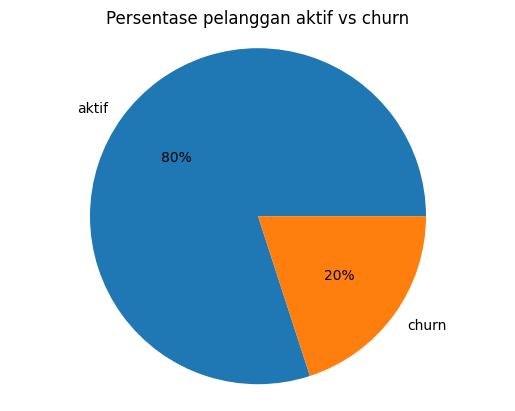

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dfaktifchurn['product'], labels=['aktif','churn'], autopct='%1.0f%%')
plt.title('Persentase pelanggan aktif vs churn')
plt.axis('equal')
plt.show()

In [ ]:
df1['product'].value_counts()

product
Kartu C    7548
Kartu B    1679
Kartu A     773
Name: count, dtype: int64

In [ ]:
pd.get_dummies(df1['product'])

In [ ]:
df2 = pd.concat([df1, pd.get_dummies(df1['product'])], axis=1, sort=False)
df2.drop(['product'], axis = 1, inplace=True)

In [ ]:
dfkorelasi = df2.corr()

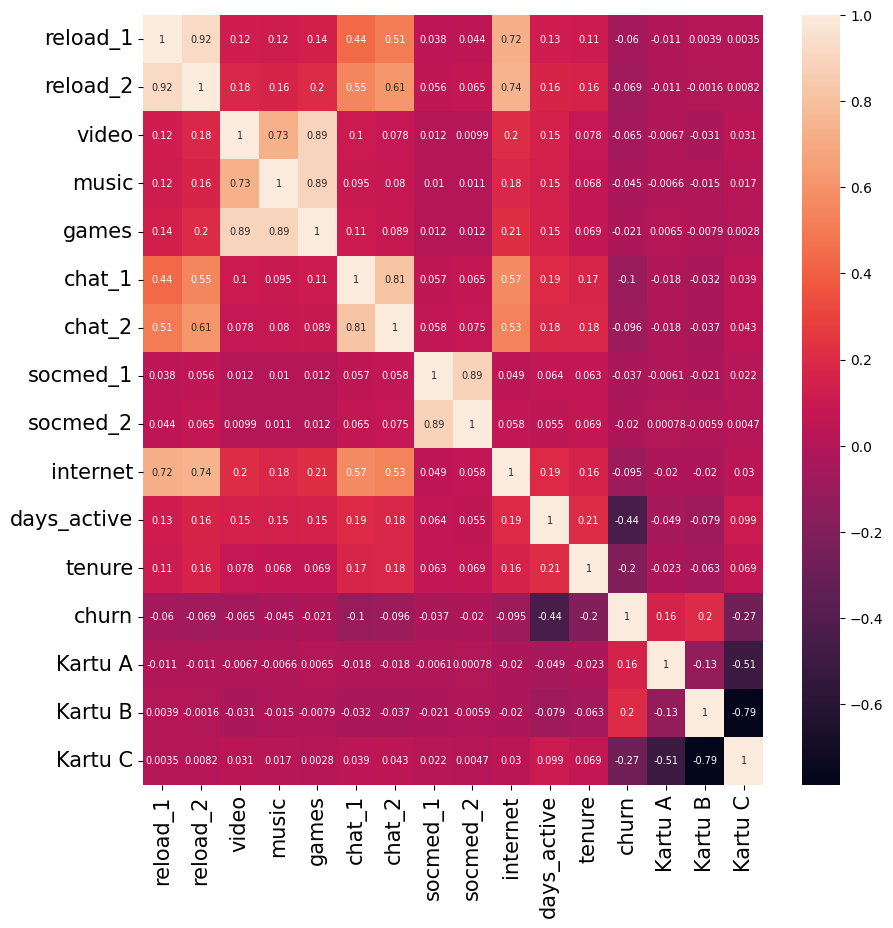

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfkorelasi = df2.corr()
sns.heatmap(dfkorelasi, xticklabels=dfkorelasi.columns.values, yticklabels=dfkorelasi.columns.values, annot=True,
            annot_kws={'size': 7})
heat_map = plt.gcf()
heat_map.set_size_inches(10, 10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
X = df2.drop(['reload_2','socmed_2', 'games', 'churn'], axis=1, inplace=False)
y = df2['churn']

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.8,random_state=0)

In [ ]:
import sklearn.preprocessing as pp
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test =  scl.transform(X_test)

MELATIH MODEL

In [ ]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print("Accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print("AUC=", auc)

[1 0 0 ... 0 0 0]
Accuracy= 0.82975
precision= 0.6256627783669141
recall= 0.3689806128830519
AUC= 0.6569164898503683


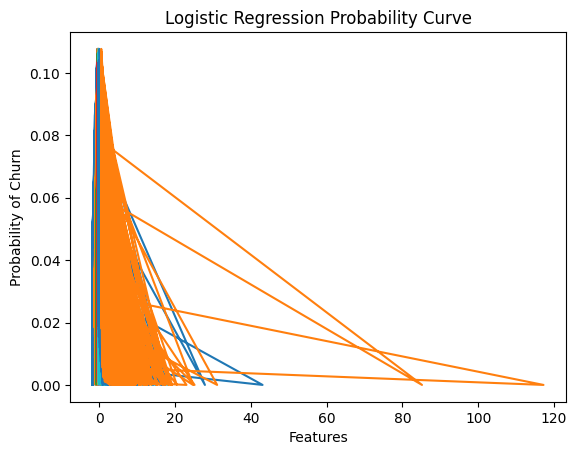

In [ ]:
import numpy as np

# Mempersiapkan data untuk kurva Logistic Regression
X_test_sorted = np.sort(X_test)
y_pred_proba = model.predict_proba(X_test_sorted)[:,1]

# Membuat plot kurva Logistic Regression
plt.plot(X_test_sorted, y_pred_proba)
plt.xlabel('Features')
plt.ylabel('Probability of Churn')
plt.title('Logistic Regression Probability Curve')
plt.show()

RANDOM FOREST

In [ ]:
import sklearn.ensemble as ens
import sklearn.metrics as met
model = ens.RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print("Accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print("AUC=", auc)

[1 0 1 ... 1 0 0]
Accuracy= 0.910875
precision= 0.7997293640054127
recall= 0.7392120075046904
AUC= 0.8464846164691082


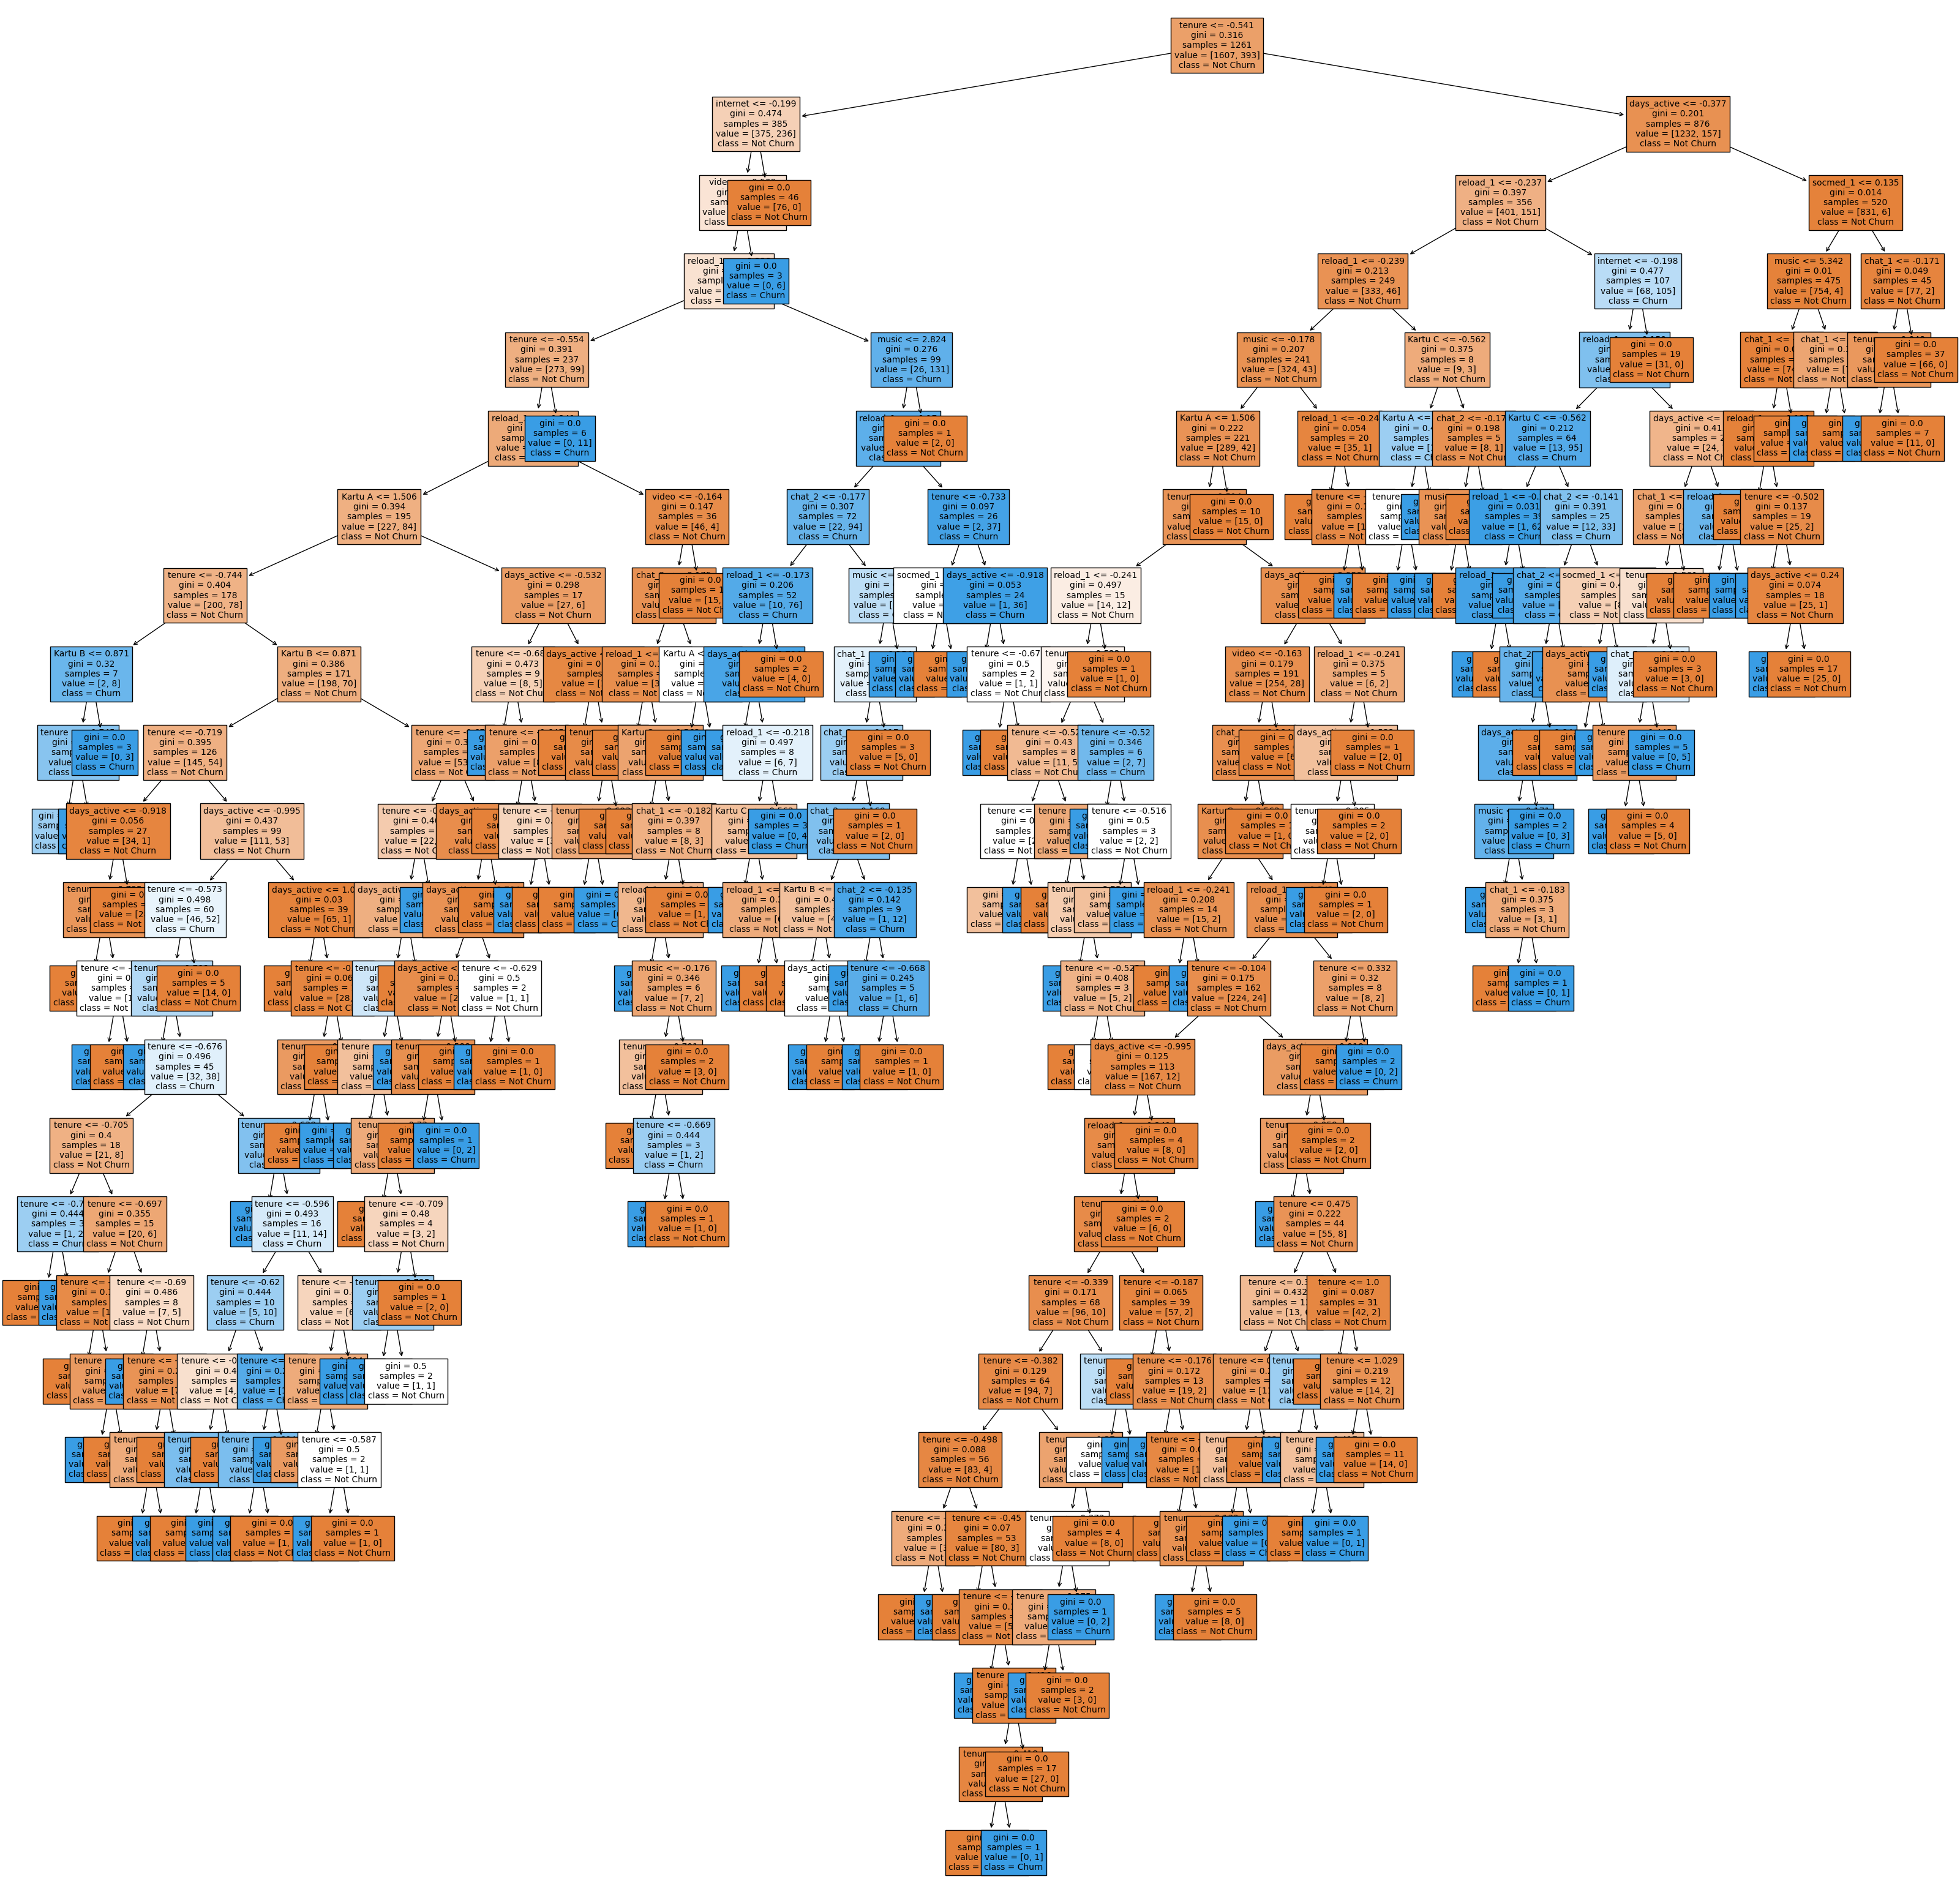

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
# Mengatur ukuran gambar yang lebih besar
plt.figure(figsize=(40, 40))

# Membuat plot dari satu pohon dengan ukuran gambar yang lebih besar dan font yang lebih besar
tree.plot_tree(estimator, feature_names=X.columns, class_names=["Not Churn", "Churn"], filled=True, fontsize=10)
plt.show()

<Axes: >

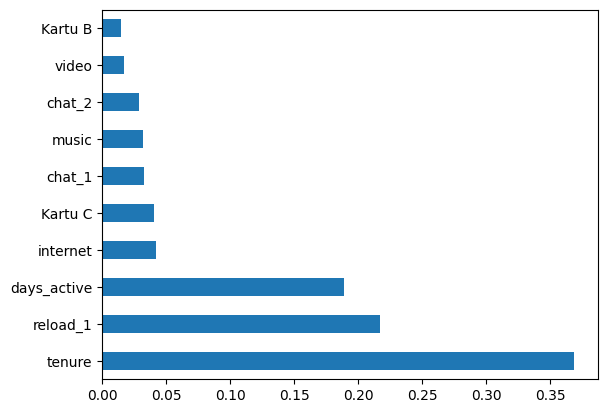

In [ ]:
feature_penting = pd.Series(model.feature_importances_, index=X.columns)
feature_penting.nlargest(10).plot(kind='barh')